In [75]:
import numpy as np
import pandas as pd
import sys
import seaborn as sns
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
factor_table = pd.read_csv("Factor_Table.csv", index_col=["transactionid"])
frequency_table = pd.read_csv("Frequency_Table.csv", index_col=["transactionid"])

In [23]:
factor_table.head()

,140.0,1600.0,653.0,1224.0,395.0,859.0,1698.0,1482.0,1532.0,250.0,679.0,791.0,1579.0,1490.0,803.0,378.0,1452.0,431.0
transactionid,,,,,,,,,,,,,,,,,,
0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
frequency_table[10:15]

,140.0,1600.0,653.0,1224.0,395.0,859.0,1698.0,1482.0,1532.0,250.0,679.0,791.0,1579.0,1490.0,803.0,378.0,1452.0,431.0
transactionid,,,,,,,,,,,,,,,,,,
10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
factor_table_sample = factor_table[:10000]

In [3]:
factor_table.shape

(17313, 18)

In [16]:
frequency_table.drop_duplicates().shape

ERROR! Session/line number was not unique in database. History logging moved to new session 170


(315, 18)

In [15]:
a = factor_table.drop_duplicates()
a.shape

(121, 18)

### K-Means Clustering

In [76]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [8]:
Nc = range(120,125)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [10]:
sse1 = [kmeans[i].fit(factor_table).inertia_ for i in range(len(kmeans))]
#sse2 = [kmeans[i].fit(frequency_table).inertia_ for i in range(len(kmeans))]

In [51]:
#kmeans[1]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=74, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Using Euclidean Distance

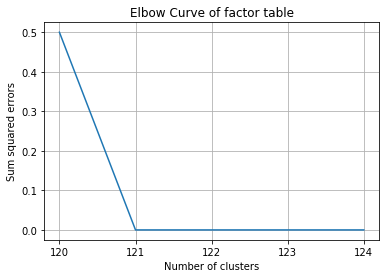

In [11]:
plt.plot(Nc,sse1);
#plt.plot(Nc,sse2);
plt.xlabel("Number of clusters");
plt.ylabel("Sum squared errors");
plt.title("Elbow Curve of factor table");
plt.xticks(range(120,125));
plt.grid();

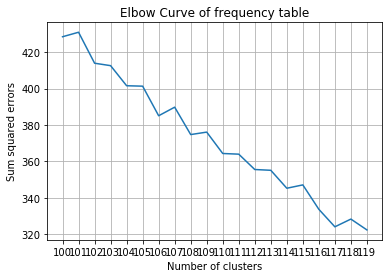

In [47]:
plt.plot(Nc,sse2);
#plt.plot(Nc,sse2);
plt.xlabel("Number of clusters");
plt.ylabel("Sum squared errors");
plt.title("Elbow Curve of frequency table");
plt.xticks(range(100,120));
plt.grid();


In [39]:
(sse1[19], sse2[19])
#len(sse1)

(213.81836969634674, 2882.0448060269064)

In [39]:
#find_inertia(kmeans[10].cluster_centers_, kmeans[10].labels_, factor_table_sample.values)

312.1424981603218

In [52]:
metrics.silhouette_score(factor_table_sample, kmeans[4].labels_, metric='euclidean')

0.9926500612494896

#### Using Hamming's distance

### Mean shift

In [62]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [64]:
ms = MeanShift().fit(factor_table_sample)
labels = ms.labels_
#cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
n_clusters_

99

In [18]:
frequency_table.drop_duplicates().shape

(315, 18)

In [17]:
ms2 = MeanShift().fit(frequency_table)
labels2 = ms2.labels_
#cluster_centers = ms.cluster_centers_
labels_unique2 = np.unique(labels2)
n_clusters2_ = len(labels_unique2)
n_clusters2_

104

In [31]:
ms2.get_params()

{'bandwidth': None,
 'bin_seeding': False,
 'cluster_all': True,
 'min_bin_freq': 1,
 'n_jobs': 1,
 'seeds': None}

In [27]:
def find_inertia(centres, labels, data):
    '''Function to compute inertia or sse from cluster centres, labels and data points (all inpython list format)'''
    sse = 0.0
    for i in xrange(len(data)):
        vec_diff = data[i] - centres[labels[i]]
        norm  = np.linalg.norm(vec_diff)
        sse = sse + norm**2
    return sse

312.1424981603166

In [28]:
find_inertia(ms.cluster_centers_, ms.labels_, factor_table.values)

0.0

In [29]:
find_inertia(ms2.cluster_centers_, ms2.labels_, frequency_table.values)

3891.978233412058

In [24]:
metrics.silhouette_score(factor_table, ms.labels_, metric='euclidean', sample_size=5000)

0.9924

In [25]:
metrics.silhouette_score(frequency_table, ms2.labels_, metric='euclidean', sample_size=5000)

0.7245941571319652

### Spectral Clustering Algo

In [100]:
from sklearn.cluster import SpectralClustering

In [62]:
#clustering = [SpectralClustering(n_clusters=i) for i in Nc]

In [101]:
cluster = SpectralClustering(n_clusters=12).fit(factor_table_sample)

/home/partha/anaconda/envs/analytics_py2.7/lib/python2.7/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


In [55]:
#find_inertia(cluster.cluster_centers_, cluster.labels_, factor_table_sample.values)

In [66]:
sse1 = [kmeans[i].fit(factor_table) for i in range(len(kmeans))]

array([[3.63300208e-01, 1.22197828e-01, 6.18788999e-02, 7.01987520e-02,
        7.78830599e-02, 5.37323781e-03, 1.13820199e-02, 9.31938988e-02,
        1.21273400e-01, 2.49595563e-02, 3.08527848e-02, 1.47330714e-02,
        5.19990756e-04, 2.67506355e-02, 1.09775826e-03, 7.74208459e-03,
        4.04437254e-04, 5.77767506e-05]])

In [54]:
#a = factor_table - labels.cluster_centers_
#inertia(factor_table, labels.cluster_centers_)

In [73]:
labels = kmeans[10].fit(factor_table)

In [80]:
labels.inertia_
#labels.cluster_centers_

921.1158576094821

In [ ]:
labels.predict(factor_table)

In [102]:
metrics.silhouette_score(factor_table_sample, cluster.labels_, metric='euclidean')

0.9175215546907343

In [103]:
kmean[3]

0.9348443528564441

### Hierarchical Clustering

In [65]:
nclusters = range(10, 100)

In [4]:
from sklearn.cluster import AgglomerativeClustering
#from sklearn.metrics import pairwise_distances

In [66]:
dist_comp_df = pd.DataFrame(columns=["Euclidean", "Manhattan", "Cosine"])

In [54]:
len(cosine)

0

In [67]:
eucl = []
manhattan = []
cosine = []

In [68]:
for n_cluster in nclusters:
    model = AgglomerativeClustering(n_clusters=n_cluster,linkage="average", affinity="euclidean")
    model.fit(factor_table_sample)
    model2 = AgglomerativeClustering(n_clusters=n_cluster,linkage="average", affinity="manhattan")
    model2.fit(factor_table_sample)
    model3 = AgglomerativeClustering(n_clusters=n_cluster,linkage="average", affinity="cosine")
    model3.fit(factor_table_sample)
    eucl.append(metrics.silhouette_score(factor_table_sample, model.labels_, metric='euclidean'))
    manhattan.append(metrics.silhouette_score(factor_table_sample, model2.labels_, metric='manhattan'))
    cosine.append(metrics.silhouette_score(factor_table_sample, model3.labels_, metric='cosine'))

In [69]:
dist_comp_df.Euclidean = eucl
dist_comp_df.Manhattan = manhattan
dist_comp_df.Cosine = cosine

In [59]:
dist_comp_df

,Euclidean,Manhattan,Cosine
0,0.956752,0.958529,0.960526
1,0.959763,0.961421,0.965827
2,0.959861,0.961203,0.971831
3,0.961955,0.963152,0.973976
4,0.964364,0.965410,0.973982
5,0.970816,0.971751,0.974255
6,0.970878,0.971788,0.976840
7,0.975100,0.975795,0.977302
8,0.975476,0.975930,0.977349
9,0.980888,0.981285,0.977916


In [73]:
%matplotlib inline

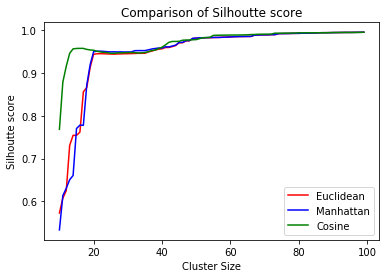

In [74]:
fig, ax = plt.subplots()

ax.plot(nclusters, dist_comp_df.Euclidean, 'r', label='Euclidean')
ax.plot(nclusters, dist_comp_df.Manhattan, 'b', label='Manhattan')
ax.plot(nclusters, dist_comp_df.Cosine, 'g', label='Cosine')
#ax.axis('equal')
leg = ax.legend();
ax.set_xlabel("Cluster Size")
ax.set_ylabel("Silhoutte score")
ax.set_title("Comparison of Silhoutte score");
fig.show();

In [56]:
#Comparison across models

In [77]:
eucl = []
manhattan = []
cosine = []
kmean = []

In [80]:
for n_cluster in nclusters:
    #model = AgglomerativeClustering(n_clusters=n_cluster,linkage="average", affinity="euclidean")
    #model.fit(factor_table_sample)
    model2 = AgglomerativeClustering(n_clusters=n_cluster,linkage="average", affinity="manhattan")
    model2.fit(factor_table_sample)
    model3 = AgglomerativeClustering(n_clusters=n_cluster,linkage="average", affinity="cosine")
    model3.fit(factor_table_sample)
    model4 = KMeans(n_clusters=n_cluster)
    model4.fit(factor_table_sample)
    kmean.append(metrics.silhouette_score(factor_table_sample, model4.labels_, metric='euclidean'))
    manhattan.append(metrics.silhouette_score(factor_table_sample, model2.labels_, metric='manhattan'))
    cosine.append(metrics.silhouette_score(factor_table_sample, model3.labels_, metric='cosine'))
    
    

In [94]:
df = pd.DataFrame()

In [91]:
len(manhattan[len(manhattan)-90:])

90

In [95]:
#dist_comp_df.Euclidean = eucl
df["Manhattan_Agglo"] = manhattan[len(manhattan)-90:]
df["Cosine_Agglo"] = cosine[len(cosine)-90:]
df["KMean"] = kmean

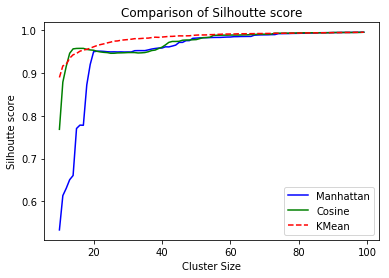

In [98]:
fig, ax = plt.subplots()

#ax.plot(nclusters, dist_comp_df.Euclidean, 'r', label='Euclidean')
ax.plot(nclusters, df.Manhattan_Agglo, 'b', label='Manhattan')
ax.plot(nclusters, df.Cosine_Agglo, 'g', label='Cosine')
ax.plot(nclusters, df.KMean, '--r', label='KMean')
#ax.axis('equal')
leg = ax.legend();
ax.set_xlabel("Cluster Size")
ax.set_ylabel("Silhoutte score")
ax.set_title("Comparison of Silhoutte score");
fig.show();

### Inferencing

In [ ]:
kmeans = np.array(KMeans(n_clusters=12).fit_predict(factor_table))
cluster_freq = {}
for x in range(12):
    cluster_freq[x] = (kmeans == x).sum()

In [ ]:
sns.barplot(x=cluster_freq.keys(),y=cluster_freq.values());
plt.xlabel("Cluster number");
plt.ylabel("Number of baskets in the cluster");